In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import math
import os.path

import keras
import sklearn
import pandas
import numpy
import seaborn
from matplotlib import pyplot as plt

from microesc import urbansound8k, preprocess, train, test, stm32convert, stats, settings, models, features, common

import soundEmbeddings


Using TensorFlow backend.


In [3]:
dataset = soundEmbeddings.loadfiles()
dataset.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class,embeddings
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark,"[[2.1236882, 0.81460965, 3.5231187, 3.7944224,..."
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing,"[[1.7620703, 1.2691782, 3.2583752, 2.5146453, ..."
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing,"[[1.8254017, 2.1947274, 3.260826, 2.316478, 3...."
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing,"[[2.0583222, 1.9921124, 3.250255, 2.719343, 3...."
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing,"[[1.8772528, 1.23503, 3.252353, 2.717335, 3.24..."


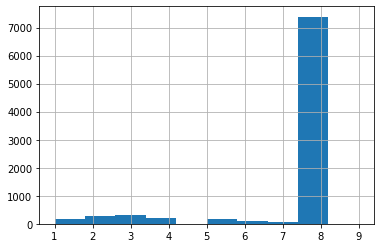

In [4]:
embedding_times = dataset['embeddings'].apply(lambda emb: emb.shape[0])
embedding_times.hist()

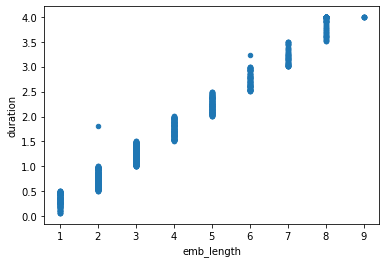

In [5]:
times = dataset.copy()
times['emb_length'] = embedding_times
times['duration'] = times.end - times.start
times.plot.scatter(x='emb_length', y='duration')
samples = dataset.sample(1000)


(1000, 512)
(1000, 200)


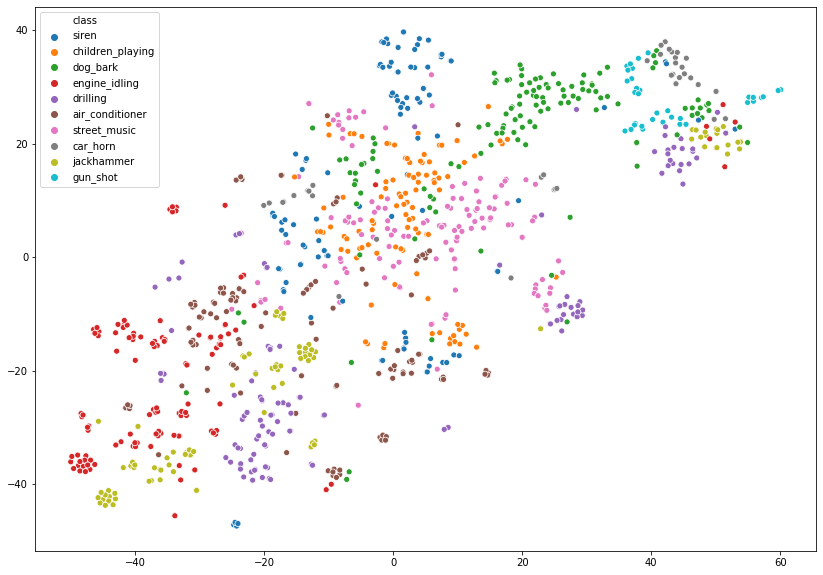

In [19]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


# def summarize_embedding(emb):
#     return numpy.mean(emb, axis=0)
def max_embedding(emb):
    return numpy.amax(emb, axis=0)


embeddings = samples['embeddings'].apply(max_embedding)
embeddings = numpy.stack(embeddings.values)
print(embeddings.shape)

pca = PCA(n_components=200, whiten=False)
emb_pca = pca.fit_transform(embeddings)
print(emb_pca.shape)

var = pca.explained_variance_ratio_

tsne = TSNE(n_components=2, perplexity=40.0, early_exaggeration=12.0, learning_rate=250.0, n_iter=5000, random_state=0,init='pca')

emb_tsne = tsne.fit_transform(emb_pca)

fig, ax = plt.subplots(figsize=(14,10))
#ax.scatter(emb_tsne[:,1], emb_tsne[:,0], c=samples['classID'])
seaborn.scatterplot(x=emb_tsne[:,1], y=emb_tsne[:,0], hue=samples['class'])
